# Basin heat uptake

In [41]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd
import cosima_cookbook as cc
from collections import OrderedDict


In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [34]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')


In [33]:
surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session)
month_length = surface_heat_flux.time.dt.days_in_month
month_length

surface_heat_flux = surface_heat_flux.weighted(month_length)
hello = surface_heat_flux.groupby('time.year').mean('time')
hello

AttributeError: 'DataArrayWeighted' object has no attribute 'groupby'

In [22]:
cc.querying.getvar(expt,'net_sfc_heating',session)

,Array,Chunk
Bytes,311.04 MB,432.00 kB
Shape,"(720, 300, 360)","(1, 300, 360)"
Count,1446 Tasks,720 Chunks
Type,float32,numpy.ndarray


In [135]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session,start_time='2900-01-01')#.groupby('time.year').sum(dim='time')


In [142]:
surface_heat_flux_cont = surface_heat_flux_cont.sel(time = slice('2900-01-01','2950-01-01'))
surface_heat_flux_cont

,Array,Chunk
Bytes,259.20 MB,432.00 kB
Shape,"(600, 300, 360)","(1, 300, 360)"
Count,2046 Tasks,600 Chunks
Type,float32,numpy.ndarray


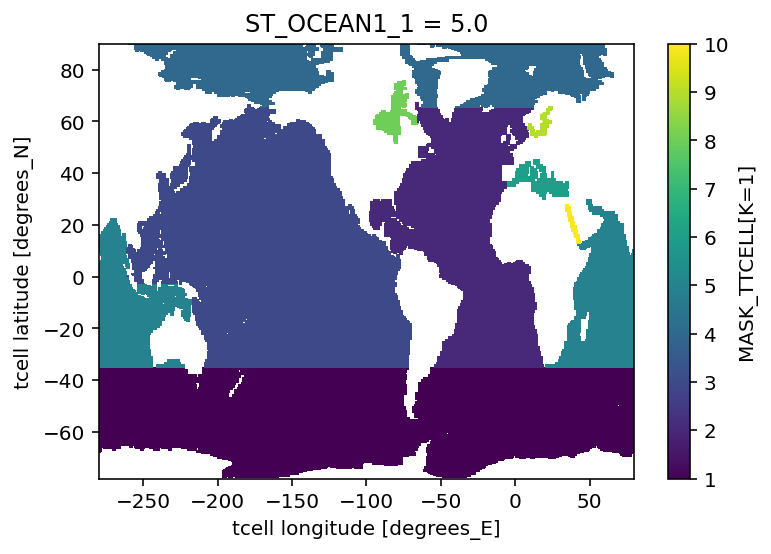

In [5]:
basinmask = xr.open_dataset('/scratch/e14/cy8964/access-om2/mask/basin_mask.nc')
basinmask.BASIN_MASK.plot()

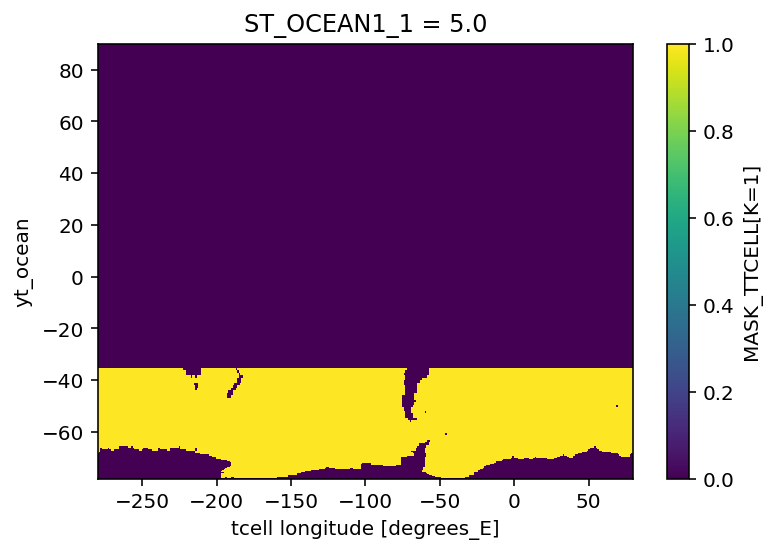

In [111]:
southern_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK < 2)).isel(ST_OCEAN1_1 = 0).fillna(0)
southern_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
southern_mask = southern_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
southern_mask.plot()

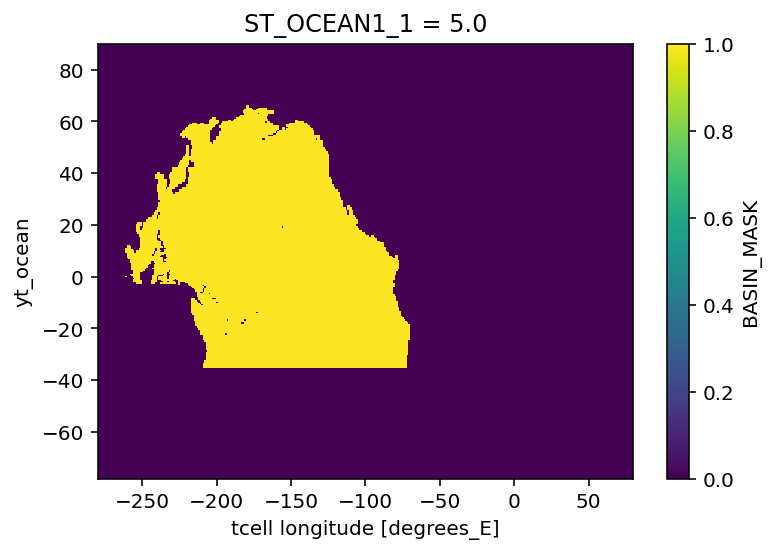

In [110]:
pacific_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 2).where(basinmask.BASIN_MASK < 4)/3).isel(ST_OCEAN1_1 = 0).fillna(0)
pacific_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
pacific_mask = pacific_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
pacific_mask.plot()

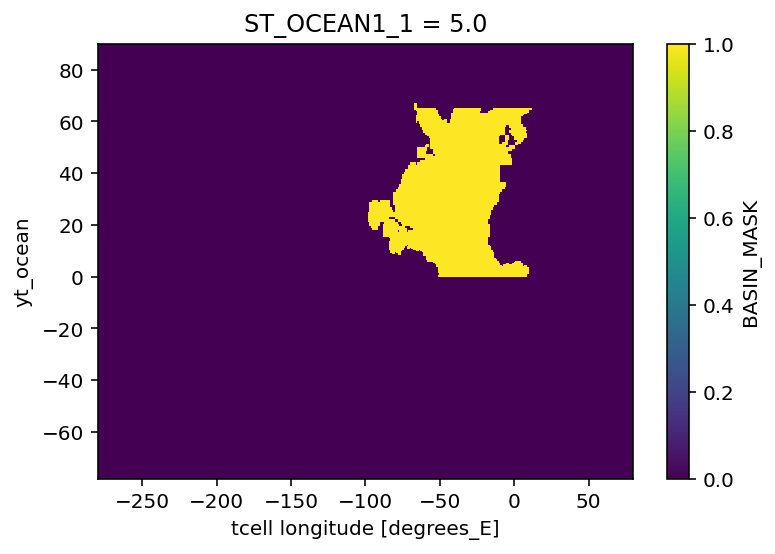

In [109]:
north_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
north_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
north_atlantic_mask = north_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
north_atlantic_mask.plot()

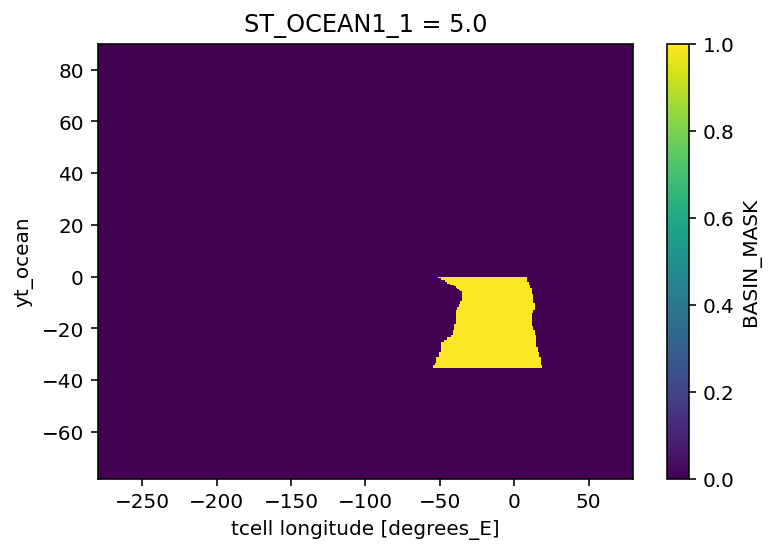

In [108]:
south_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN < 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
south_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
south_atlantic_mask = south_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
south_atlantic_mask.plot()

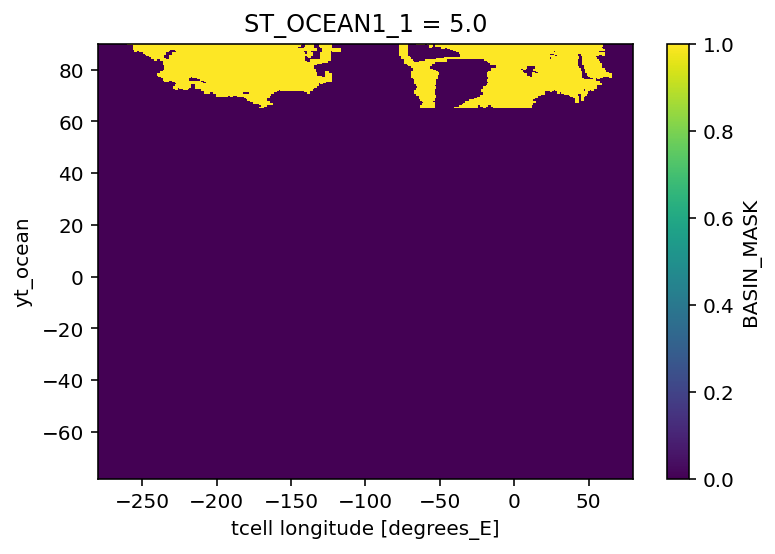

In [186]:
arctic_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 3).where(basinmask.BASIN_MASK < 5)/4).isel(ST_OCEAN1_1 = 0).fillna(0)
arctic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
arctic_mask = arctic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
arctic_mask.plot()

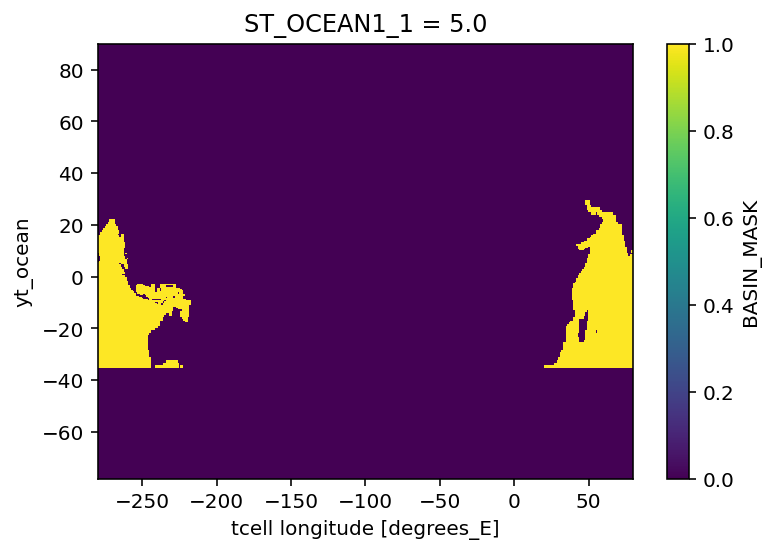

In [187]:
indian_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).fillna(0)
indian_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
indian_mask = indian_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
indian_mask.plot()

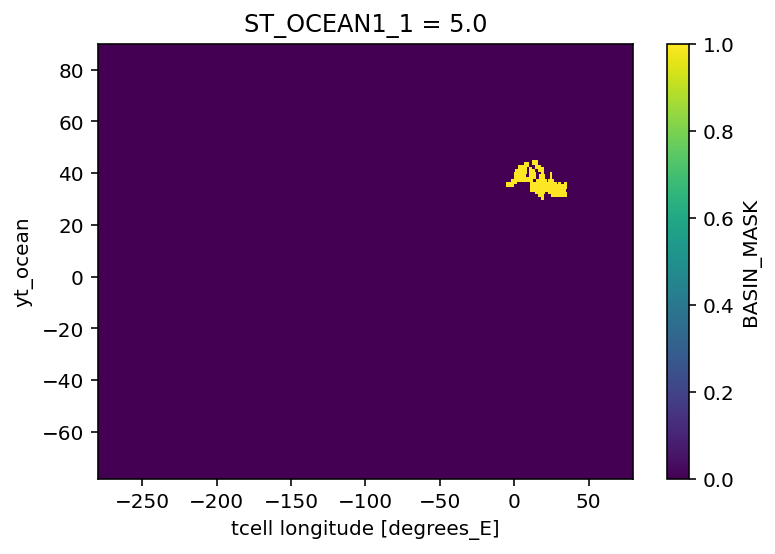

In [105]:
mediterranean_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 5).where(basinmask.BASIN_MASK < 7)/6).isel(ST_OCEAN1_1 = 0).fillna(0)
mediterranean_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
mediterranean_mask = mediterranean_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
mediterranean_mask.plot()

there are also some smaller masks e.g. baltic sea, hudson bay (canada) and red sea (middle east)

Note surface flux $$ Q = \frac{dq}{dt} - Z $$ where $Q$ is surface heat flux, $q$ is vertically integrated heat content, and $Z$ is horizontal flow of heat out of the region.
If we integrate surface flux over time then we get $$ \int_{t=0}^{t=50}Qdt = q(t=50)-q(t=0) - \int_{t=0}^{t=50}Zdt $$
Now we want to look at anomalies. So if we sum the surface flux anomaly over time we get the verticla heat anomaly at t=50 - vertical heat anomaly at t=0 and the difference is the total time integrated horizontal heat transport.
vertical heat anomaly at year = 0 is not zero bc average is in middle of year. but should be zero at time = 0

Surface flux

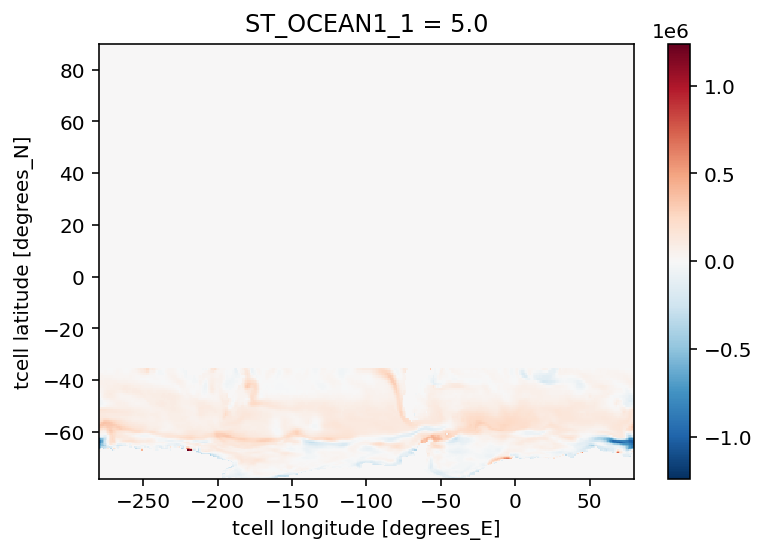

In [36]:
((surface_heat_flux_warm-surface_heat_flux_cont)*(month_length).sum('time')*southern_mask).plot()

In [38]:
((surface_heat_flux_warm-surface_heat_flux_cont*month_length*24*3600).sum('time')*southern_mask*darray3).sum('xt_ocean').sum('yt_ocean').values

array(5.95115161e+23)

Heat uptake

In [14]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K


In [15]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')


In [125]:
expt = '1deg_jra55_ryf_RCPcont'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cont = (rho_0*c_p*darray1*darray2).sum('st_ocean')


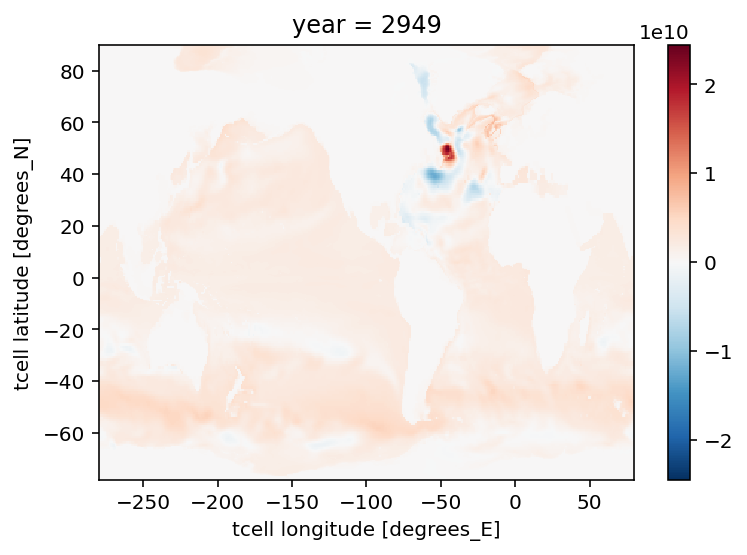

In [17]:
(vertically_integrated_heat_warm-vertically_integrated_heat_cont).groupby('time.year').mean('time').isel(year = 49).plot()

In [20]:
((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*southern_mask*darray3).groupby('time.year').mean('time').isel(year = 49).sum('xt_ocean').sum('yt_ocean').values

array(2.25707839e+23)

In [150]:
def heat_cont(ekey,basin_mask, year):
    rho_0 = 1030#kg/m^3
    c_p = 3992 
    expt = exptdict[ekey]['expt']
    variable1 = 'temp'
    darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
    variable2 = 'dzt'
    darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
    variable3 = 'area_t'
    darray3 = cc.querying.getvar(expt, variable3, session,n=1)
    vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')
    
    basin_heat_content = ((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*basin_mask*darray3).groupby('time.year').mean('time').isel(year = year).sum('xt_ocean').sum('yt_ocean').values
    
    surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return basin_heat_content, basin_surface_int

In [151]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'})

])

In [188]:
basins = np.array([southern_mask, pacific_mask, indian_mask, north_atlantic_mask, south_atlantic_mask, arctic_mask, mediterranean_mask])

In [153]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
print(basin_heat_content)
print(basin_surface_int)

2.2570783942972134e+23
4.455841434340915e+23


In [154]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])



In [155]:
southern

array([ 2.25707839e+23,  4.45584143e+23, -2.19876304e+23])

In [156]:
surface_heat_flux_cont

,Array,Chunk
Bytes,259.20 MB,432.00 kB
Shape,"(600, 300, 360)","(1, 300, 360)"
Count,2046 Tasks,600 Chunks
Type,float32,numpy.ndarray


In [157]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))

In [158]:
data

array([[ 2.25707839e+23,  2.38478297e+23,  3.69656566e+22,
         4.29141401e+22,  9.84244452e+21,  4.14492815e+21],
       [ 4.45584143e+23,  1.47075883e+23,  2.41827570e+22,
         3.06448640e+21, -5.51424658e+22,  3.16671577e+21],
       [-2.19876304e+23,  9.14024146e+22,  1.27828996e+22,
         3.98496537e+22,  6.49849103e+22,  9.78212384e+20]])

Text(0.5, 1.0, 'Heat anomalies in basins after 50 years, warming perturbation')

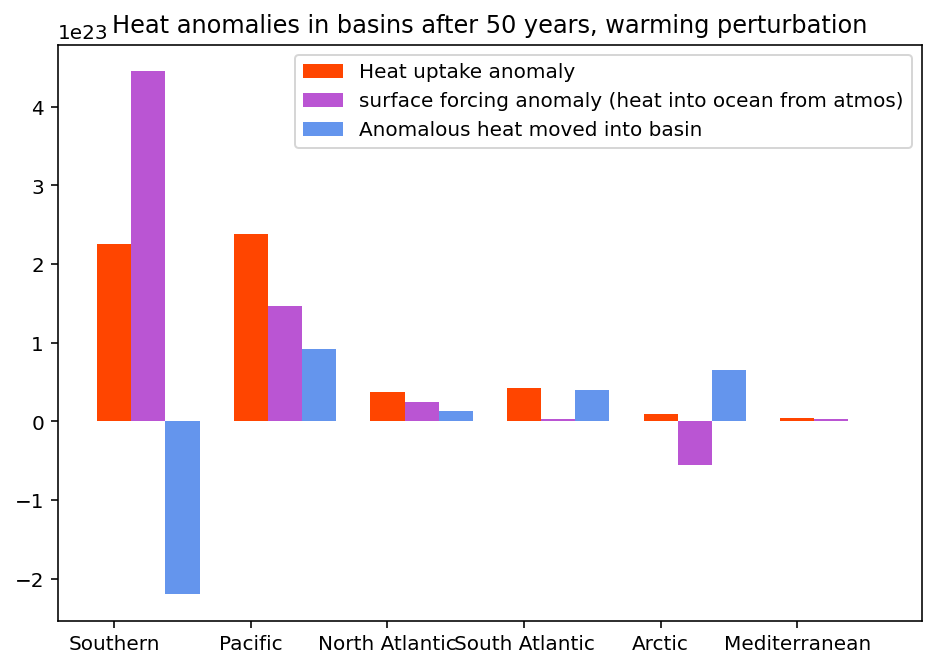

In [159]:
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation')

In [160]:
np.sum(data, axis = 1)

array([ 5.58053306e+23,  5.67931519e+23, -9.87821341e+21])

^^^ total heat content is approximately equal to total surface forcing. it's not exactly equal because i didnt include a couple of basins.


In [164]:
((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*darray3).groupby('time.year').mean('time').isel(year = 49).sum('xt_ocean').sum('yt_ocean').values

array(6.21039257e+23)

In [170]:
expt = '1deg_jra55_ryf_RCPwarmhumid'

In [171]:
surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
month_length = surface_heat_flux.time.dt.days_in_month

In [172]:
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)

In [173]:
(((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*darray3).sum('xt_ocean').sum('yt_ocean').values


array(6.22357569e+23)

indeed heat content is roughly equal to surface flux. surface flux is slightly bigger, maybe due to heat input into melting ice???

In [190]:
basin_heat_content, basin_surface_int = heat_cont('Cooling', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))

[-6.24211766e+23 -6.16343259e+23 -7.86850689e+21]


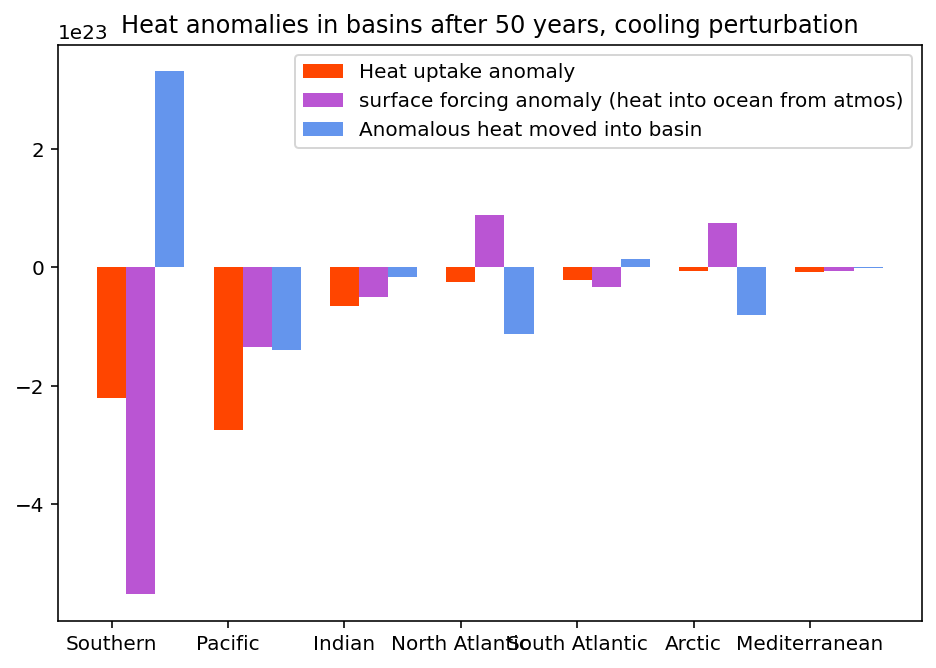

In [191]:
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, cooling perturbation')
print(np.sum(data, axis = 1))

[ 6.20631463e+23  6.21825114e+23 -1.19365104e+21]


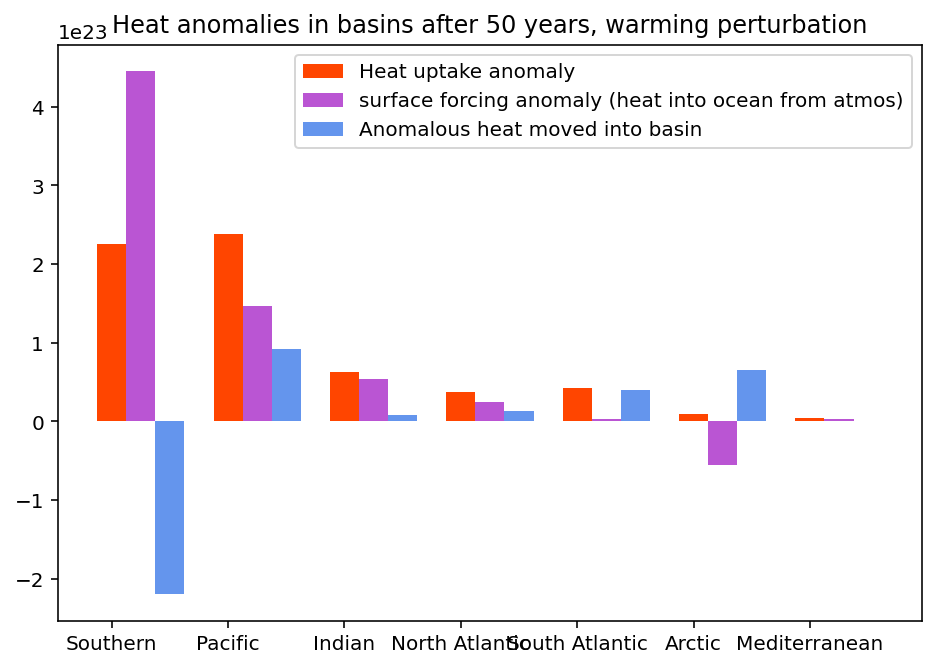

In [192]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation')
print(np.sum(data, axis = 1))

[-1.36746834e+24 -1.35385401e+24 -1.36143253e+22]


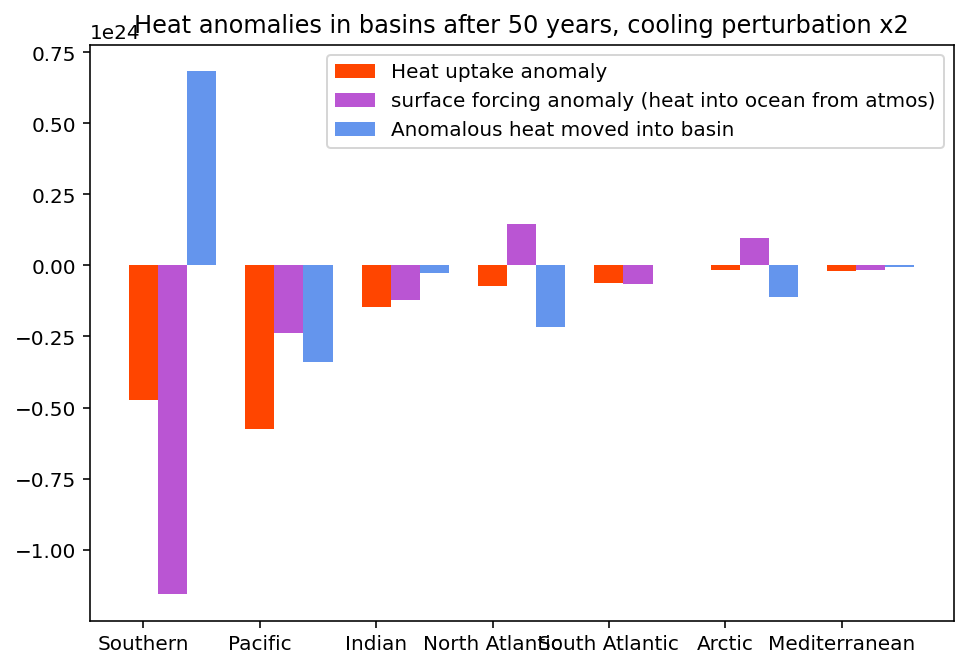

In [193]:
basin_heat_content, basin_surface_int = heat_cont('Cooling x2', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, cooling perturbation x2')
print(np.sum(data, axis = 1))

[ 1.22577727e+24  1.23389712e+24 -8.11985241e+21]


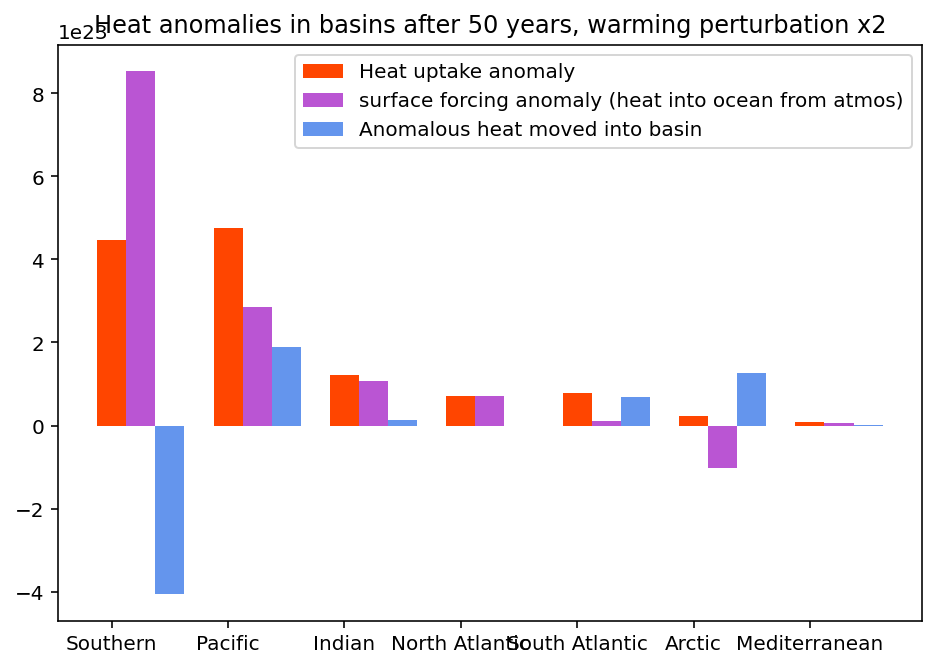

In [194]:
basin_heat_content, basin_surface_int = heat_cont('Warming x2', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation x2')
print(np.sum(data, axis = 1))